In [1]:
### Importing Libraries

import numpy as np
import pandas as pd

### Reading Dataset

In [2]:
df = pd.read_csv('daily-total-female-births-CA.csv', header=0)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


### Loading data with parse data

In [5]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


### Loading Data as a Series

In [8]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

### Exploring Time Series Data

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

### Quering by Time

In [12]:
print(series['1959-02'])

date
1959-02-01    23
1959-02-02    31
1959-02-03    44
1959-02-04    38
1959-02-05    50
1959-02-06    38
1959-02-07    51
1959-02-08    31
1959-02-09    31
1959-02-10    51
1959-02-11    36
1959-02-12    45
1959-02-13    51
1959-02-14    34
1959-02-15    52
1959-02-16    47
1959-02-17    45
1959-02-18    46
1959-02-19    39
1959-02-20    48
1959-02-21    37
1959-02-22    35
1959-02-23    52
1959-02-24    42
1959-02-25    45
1959-02-26    39
1959-02-27    37
1959-02-28    30
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-02-01') & (df2['date'] <= '1959-02-28')]

,date,births
32,1959-02-02,31
33,1959-02-03,44
34,1959-02-04,38
35,1959-02-05,50
36,1959-02-06,38
37,1959-02-07,51
38,1959-02-08,31
39,1959-02-09,31
40,1959-02-10,51
41,1959-02-11,36


### Descriptive Statistics

In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


### Data Visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
viz = df2.copy()

In [18]:
viz.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


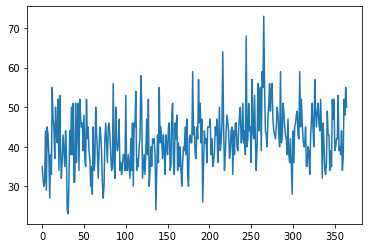

In [20]:
viz['births'].plot();

In [21]:
# making date to index value
viz.index = viz['date']

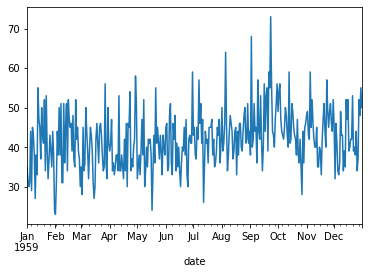

In [23]:
# plotting the data with date as x axis
viz['births'].plot();

#### Zooming In

In [24]:
viz2 = viz[(viz['date'] > '1959-01-01') & (viz['date'] <= '1959-01-10')].copy()

In [25]:
viz2.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


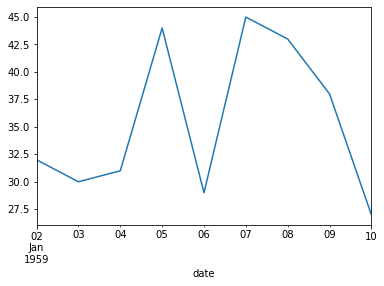

In [27]:
viz2['births'].plot();

#### Tredline

In [28]:
import seaborn as sns

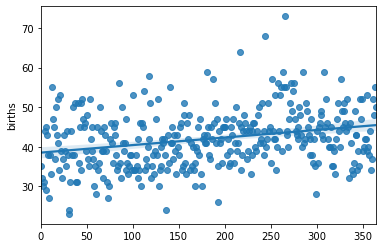

In [30]:
sns.regplot(x=df2.index.values, y=df2['births']);

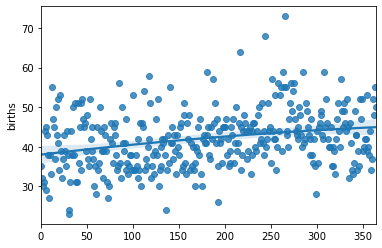

In [31]:
sns.regplot(x=df2.index.values, y=df2['births'], order=2);

In [32]:
# new DataFrame with another dataset
milesDF = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [33]:
milesDF.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


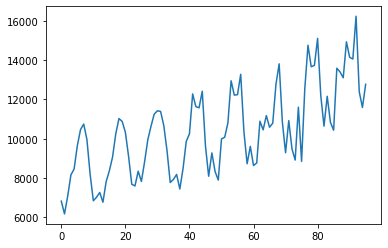

In [35]:
milesDF['MilesMM'].plotot();

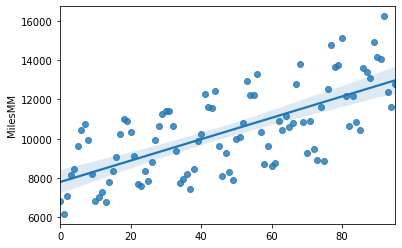

In [36]:
sns.regplot(x=milesDF.index.values, y=milesDF['MilesMM']);

#### Removing Seasonality

In [37]:
milesDF['year'] = milesDF['Month'].dt.year

In [38]:
milesDF.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [40]:
milesDF.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

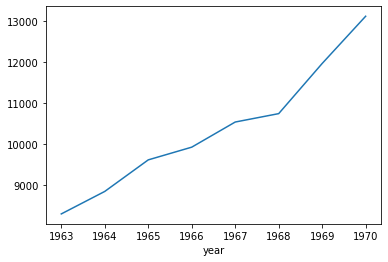

In [42]:
milesDF.groupby('year')['MilesMM'].mean().plot();

#### Creating Lag-Plots

In [43]:
milesDF['lag1'] = milesDF['MilesMM'].shift(1)

In [44]:
milesDF.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

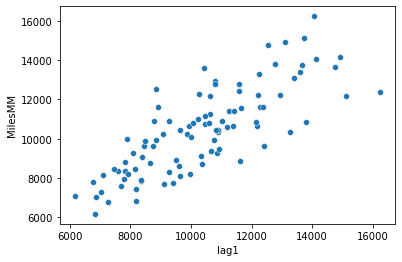

In [45]:
sns.scatterplot(x=milesDF['lag1'], y=milesDF['MilesMM']);

In [46]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

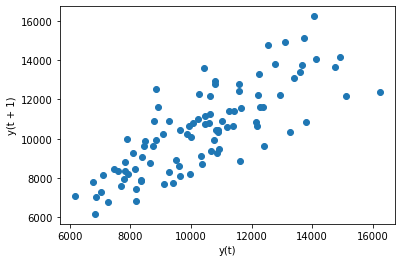

In [47]:
lag_plot(milesDF['MilesMM']);

#### AutoCorrelation Plots

In [48]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

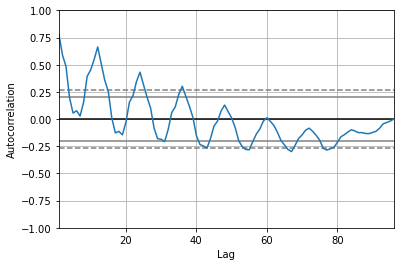

In [49]:
autocorrelation_plot(milesDF['MilesMM']);